In [10]:
import pandas as pd
import numpy as np
from arcgis.features import GeoAccessor, GeoSeriesAccessor
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv?raw=true')
df = df.fillna(value={'fips': -1})
df = df.astype({'fips': 'int64'})
sdf = pd.DataFrame.spatial.from_featureclass(r"G:\courses\qmsa\Chapter15\Chapter15.gdb\USA_Counties_COVID")
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
103955,2020-04-30,Sublette,Wyoming,56035,1,0
103956,2020-04-30,Sweetwater,Wyoming,56037,11,0
103957,2020-04-30,Teton,Wyoming,56039,65,1
103958,2020-04-30,Uinta,Wyoming,56041,6,0


In [11]:
df['fips'] = np.where((df.county == 'New York City'),1,df.fips)
df['fips'] = np.where((df.county == 'Unknown'),-1,df.fips)
df['fips'] = np.where(((df.state == 'Rhode Island') & (df.county == 'Unknown')),2,df.fips)

datelist=df['date'].unique().tolist()
datelist = datelist[40:]
datelist

['2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30']

In [3]:
import arcpy
moransIList = []
biglist = []
for idate in datelist:
    dateDF = df.loc[df.date==idate]
    print(idate)

    joinedDate = sdf.set_index('FIPSm').join(dateDF.set_index('fips')).fillna(value={'cases': 0, 'deaths': 0})
    outputLOC = r"G:\courses\qmsa\Chapter15\Chapter15.gdb\USA_Counties_COVID_" + str(idate).replace("-","_")
    #print(outputLOC)
    joinedDate["casesPerThousand"] = joinedDate["cases"] /  (joinedDate["Population"] / 1000)
    joinedDate["deathsPer100k"] = joinedDate["deaths"] /  (joinedDate["Population"] / 100000)
    joinedDate["date"] = idate
    joinedDate = joinedDate.fillna(value={'county': "", "state": ""})
    joinedDate.spatial.to_featureclass(location=outputLOC)
    moransI = arcpy.SpatialAutocorrelation_stats(outputLOC, "deathsPer100k","NO_REPORT","INVERSE_DISTANCE_SQUARED","EUCLIDEAN DISTANCE", "ROW")
    moransIList.append(moransI)
    print(moransI, joinedDate["deaths"].sum(), joinedDate["cases"].sum())
    biglist.append((moransI, joinedDate["deaths"].sum(), joinedDate["cases"].sum()))

2020-03-01
-0.000304 3.0 88.0
2020-03-02
-0.000304 6.0 104.0
2020-03-03
-0.000304 10.0 125.0
2020-03-04
-0.000618 12.0 161.0
2020-03-05
-0.000618 12.0 228.0
2020-03-06
-0.001024 15.0 310.0
2020-03-07
-0.000965 19.0 427.0
2020-03-08
0.065063 22.0 545.0
2020-03-09
0.069594 26.0 746.0
2020-03-10
0.008017 31.0 1016.0
2020-03-11
0.012695 37.0 1261.0
2020-03-12
0.019231 43.0 1664.0
2020-03-13
0.021463 50.0 2217.0
2020-03-14
0.020992 60.0 2887.0
2020-03-15
0.021663 68.0 3582.0
2020-03-16
0.011123 91.0 4481.0
2020-03-17
0.012671 116.0 5870.0
2020-03-18
0.018167 157.0 8294.0
2020-03-19
0.009823 203.0 12298.0
2020-03-20
0.011698 264.0 17833.0
2020-03-21
0.015235 342.0 24124.0
2020-03-22
0.035229 431.0 32495.0
2020-03-23
0.047556 545.0 42381.0
2020-03-24
0.084865 722.0 52607.0
2020-03-25
0.04671 969.0 66696.0
2020-03-26
0.05069 1240.0 82659.0
2020-03-27
0.083207 1624.0 99234.0
2020-03-28
0.118295 2110.0 119416.0
2020-03-29
0.119614 2367.0 136693.0
2020-03-30
0.122028 2862.0 157253.0
2020-03-31
0.

In [4]:
c = 0
newlist = []
for item in biglist:
    newlist.append((datelist[c], float(item[0][0]), int(item[1]), int(item[2])))
    #float(item[0][1]), float(item[0][2])
    c=c+1


df = pd.DataFrame(newlist, columns =['date', 'I', 'deaths', 'cases']) 
#df['rolling'] = df['I'].rolling(window=3)
df = df.set_index('date')
df['deaths_n'] = df['deaths'] / df['deaths'].max()
df['cases_n'] = df['cases'] / df['cases'].max()

a=df[['I', 'deaths_n', 'cases_n']].rolling(5,center=True, min_periods=1).mean()
b=df[['I', 'deaths', 'cases']].rolling(5,center=True, min_periods=1).mean()

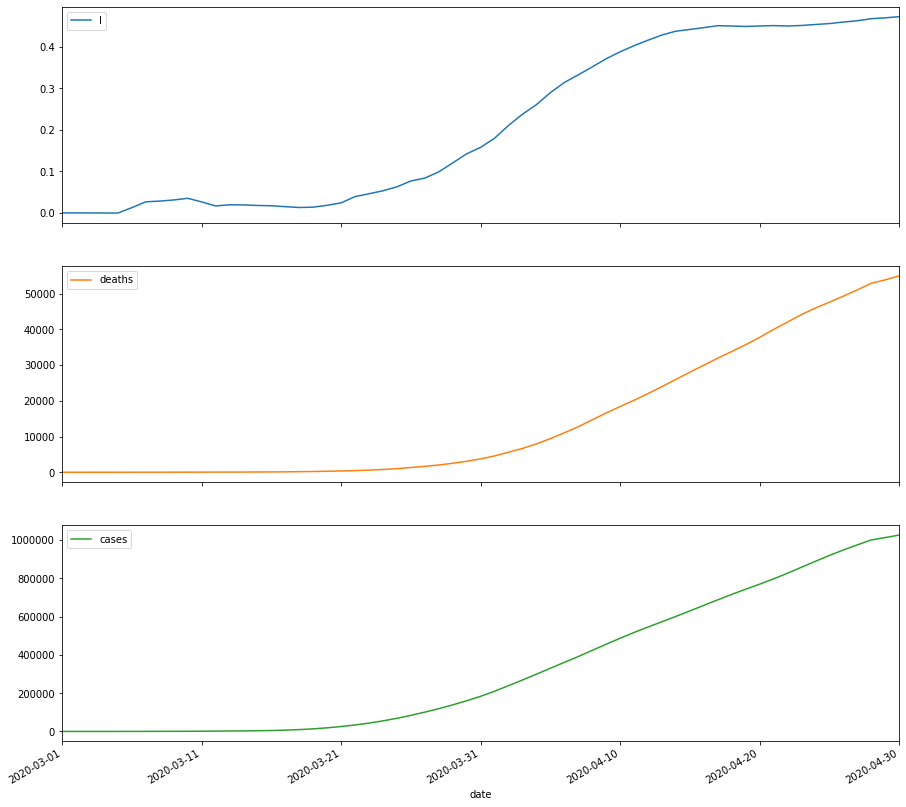

In [7]:
import matplotlib.pyplot as plt
axes = b.plot.line(subplots=True, figsize=(15,15))

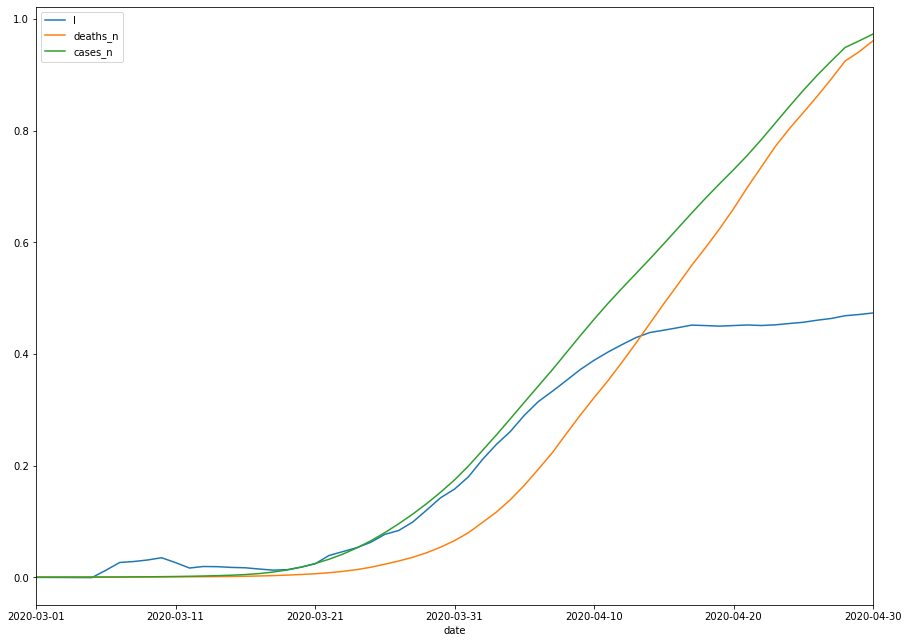

In [8]:
axes = a.plot.line(subplots=False, figsize=(15,11))